In [24]:
import os, json
from PIL import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 이미지의 가로, 세로, 화면비(가로 / 세로) 확인

In [10]:
word_data = pd.read_csv('./word_data.csv')
word_data

,image_file_name,sex,age,age_range,word,word_len
0,IMG_OCR_53_4PR_09305_1.png,female,41,40s,강원도,3
1,IMG_OCR_53_4PR_09305_2.png,female,41,40s,경상북도,4
2,IMG_OCR_53_4PR_09305_3.png,female,41,40s,경기도,3
3,IMG_OCR_53_4PR_09305_4.png,female,41,40s,인제군,3
4,IMG_OCR_53_4PR_09305_5.png,female,41,40s,영광군,3
...,...,...,...,...,...,...
462888,IMG_OCR_53_4PR_99941_28.png,male,22,20s,서운면,3
462889,IMG_OCR_53_4PR_99941_29.png,male,22,20s,복세편살,4
462890,IMG_OCR_53_4PR_99941_30.png,male,22,20s,버카충,3
462891,IMG_OCR_53_4PR_99941_31.png,male,22,20s,별다줄,3


In [19]:
word_data['width'] = word_data['image_file_name'].apply(lambda file: Image.open('./Preprocess_Word/'+file).size[0])
word_data['height'] = word_data['image_file_name'].apply(lambda file: Image.open('./Preprocess_Word/'+file).size[1])

In [20]:
word_data['aspect_ratio'] = word_data['width'] / word_data['height']

In [21]:
word_data.to_csv('word_data_with_size.csv', encoding = 'utf-8', index = False)

In [22]:
word_data

,image_file_name,sex,age,age_range,word,word_len,width,height,aspect_ratio
0,IMG_OCR_53_4PR_09305_1.png,female,41,40s,강원도,3,186,66,2.818182
1,IMG_OCR_53_4PR_09305_2.png,female,41,40s,경상북도,4,235,69,3.405797
2,IMG_OCR_53_4PR_09305_3.png,female,41,40s,경기도,3,181,62,2.919355
3,IMG_OCR_53_4PR_09305_4.png,female,41,40s,인제군,3,157,64,2.453125
4,IMG_OCR_53_4PR_09305_5.png,female,41,40s,영광군,3,162,65,2.492308
...,...,...,...,...,...,...,...,...,...
462888,IMG_OCR_53_4PR_99941_28.png,male,22,20s,서운면,3,177,85,2.082353
462889,IMG_OCR_53_4PR_99941_29.png,male,22,20s,복세편살,4,246,94,2.617021
462890,IMG_OCR_53_4PR_99941_30.png,male,22,20s,버카충,3,181,80,2.262500
462891,IMG_OCR_53_4PR_99941_31.png,male,22,20s,별다줄,3,191,81,2.358025


## 시각화

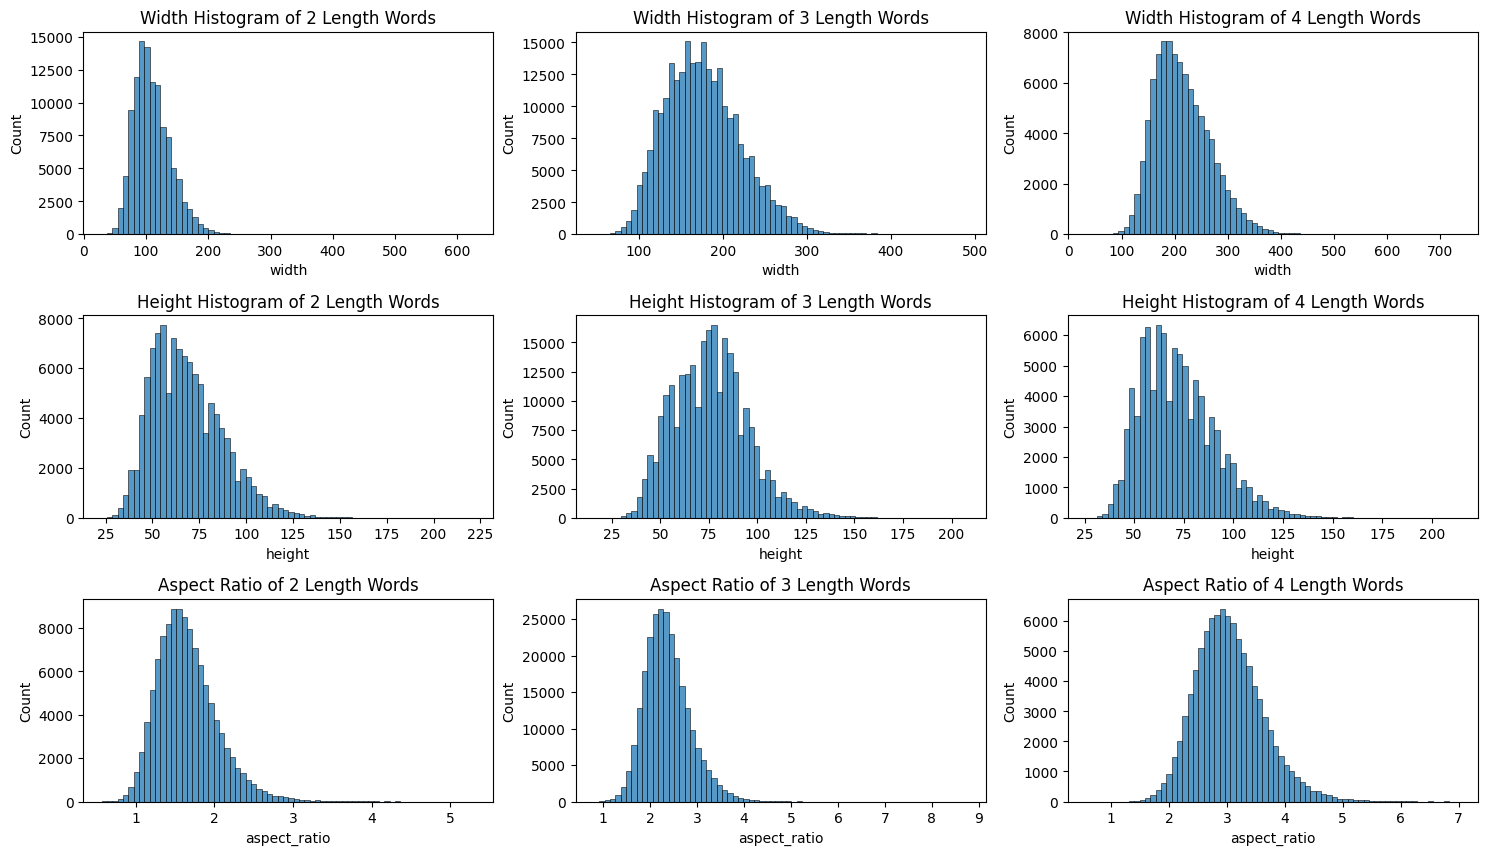

In [41]:
f, ax = plt.subplots(3, 3, figsize=(18, 10))
bin = 70

for len in range(2, 5) :
    cur_df = word_data[word_data['word_len'] == len]

    sns.histplot(cur_df['width'], bins=bin, ax=ax[0, len-2])
    ax[0, len-2].set_title(f'Width Histogram of {len} Length Words')

    sns.histplot(cur_df['height'], bins=bin, ax=ax[1, len-2])
    ax[1, len-2].set_title(f'Height Histogram of {len} Length Words')

    sns.histplot(cur_df['aspect_ratio'], bins=bin, ax=ax[2, len-2])
    ax[2, len-2].set_title(f'Aspect Ratio of {len} Length Words')

plt.subplots_adjust(hspace=0.4, wspace=0.2)